# Supervised Learning - Titanic Data

# Preprocessing Data for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')

In [3]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

- About Age: For children under 1 years old it can be fractional. 0.5 = 6 months
- sibsp:
    - siblings: bother, sister, stepbrother, and stepsister
    - Souse: husband, wife, fiance
- parch:
    - Parents: mother and father
    - Children: son, daughter, stepdaughter, stepson

> The objective is to prepare the data for ML models so we can predict whether a passenger survived or not based on the information provided (features) 

## EDA

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations: we have some nulls in Embarked and age, but lots of nulls in Cabin.

In [5]:
# checking the ratio of nulls for Cabin
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Assessment for handling nulls:
- Age: can be imputed because the ratio is above 5%
- Cabin: the column can be dropped because it has a very high ratio of nulls
- Embarked: drop the rows with nulls because the ratio is low

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The ratio of survived is low, which makes sense based on our knowledge of the Titanic incident 
- Age count is lower than other columns because of nulls
- The oldest person on the Titanic was 80. and the youngest was .42 years old (about 5 months old)
- 50% of the sample is people from 3rd class and with 0 travelers 
- Based on the 75th percentile, most passengers had 1 sibling/souse at most
- some people traveled with 0 fare. could be the staff on the ship

<Axes: ylabel='Pclass'>

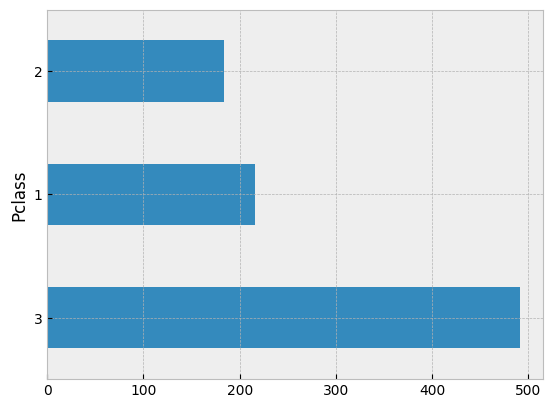

In [7]:
# let's check the distribution of PClass
df['Pclass'].value_counts().plot(kind='barh')

<Axes: ylabel='SibSp'>

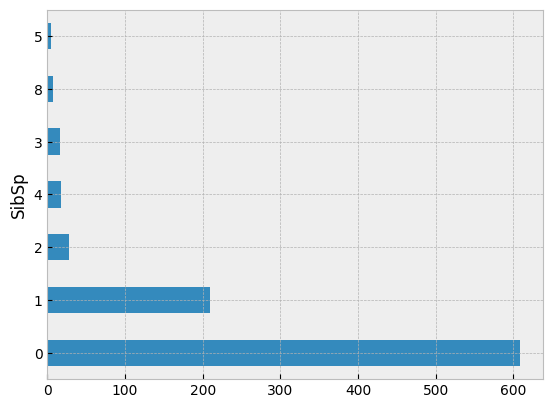

In [8]:
df['SibSp'].value_counts().plot(kind='barh')

<Axes: >

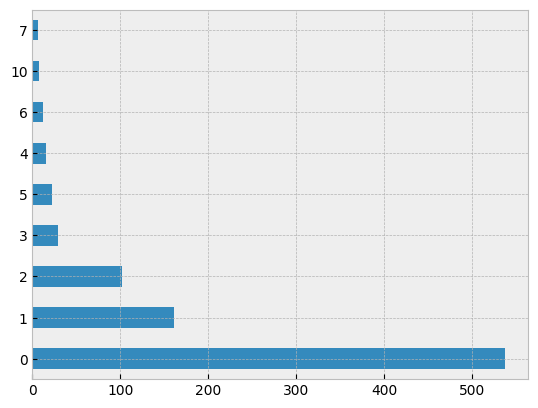

In [9]:
(df['SibSp']+df['Parch']).value_counts().plot(kind='barh')

Let's check the fare with class

In [10]:
df.groupby('Pclass')[['Fare']].agg(['min','max','mean','median'])

Fare                              
        min       max       mean   median
Pclass                                   
1       0.0  512.3292  84.154687  60.2875
2       0.0   73.5000  20.662183  14.2500
3       0.0   69.5500  13.675550   8.0500

- We see that some in 1st class did not pay for their fare. Could investors, the admiral, company execs, etc...
- 1st class passengers paid the highest cost
- Average and median of 1st class are much higher than the other classes
- May want to check if the max fare for 1st is an outlier

Let's check if there's an association between Embarked and Pclass

<Axes: xlabel='Embarked', ylabel='count'>

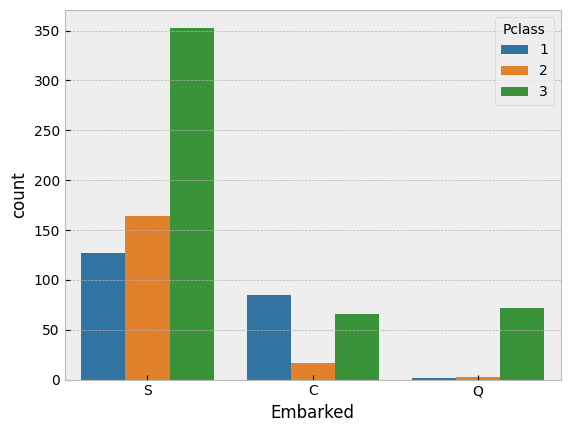

In [11]:
sns.countplot(data=df, x='Embarked', hue='Pclass', palette='tab10')

- Most people embarked from Southhampton
- In port C we have higher ratio 1st class that others
- Port S has highest Class 3 passengers 


- Southampton is a bigger port than Cherbourg or Queenstown
- 3rd class were mainly people who wanted to migrate to USA in 1912: french didn't migrate as much as british people.

Let's get the ratio of passengers that survived by port

In [12]:
df.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Port survival matches the 1st class ratio because most 3rd class passenges were in the ship's lower levels and couldn't get evacuated faster

Check for the groups that we think survived (women, children, and old people)

In [13]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


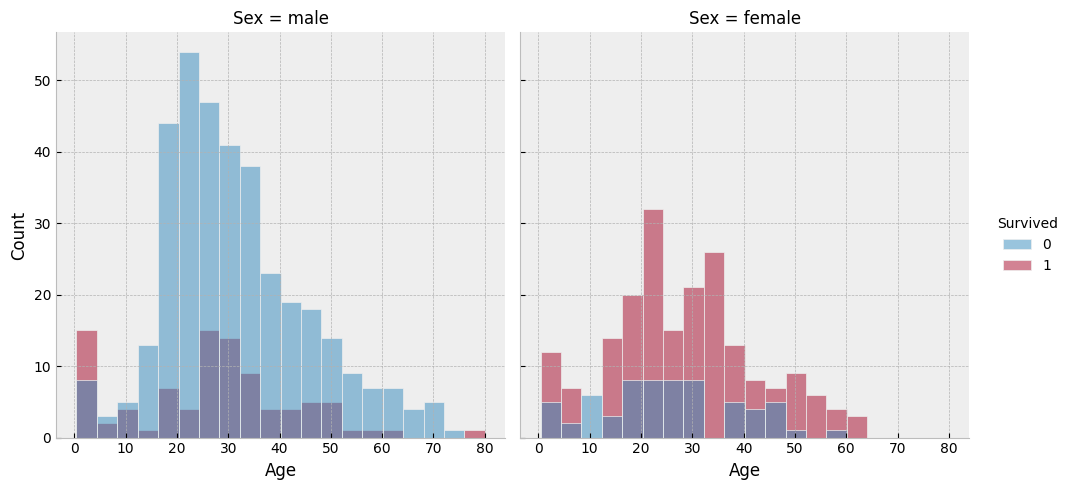

In [14]:
sns.displot(data=df, x='Age', hue='Survived', col='Sex')

- More men did survive around age 30, but overall more women survived
- The ratio of female survivors is higher than the ratio of male survivors
- In Male, children and old people have higher ratio of survival

Check for males, which class survived the most

<Axes: xlabel='Pclass', ylabel='count'>

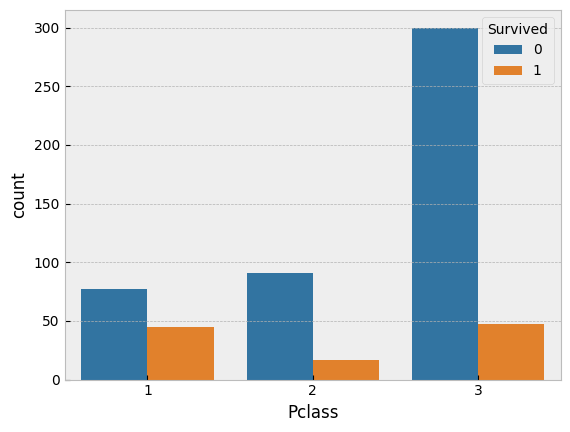

In [15]:
sns.countplot(data=df[df['Sex']=='male'], x='Pclass', hue='Survived', palette='tab10')

- Class 3 has the highest ratio of no survival 
- Compared to other classes, 1st class has the highest ratio of men that survived

In [16]:
df['Child'] = (df['Age']<=12).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
df[df['Child']==1]['Survived'].mean()

0.5797101449275363

In [18]:
df.groupby('Child')[['Survived']].mean()

,Survived
Child,
0,0.367397
1,0.579710


## Preprocessing and Feature Engineering
- Stage 1
    1. Imputation
    2. Feature Selection (dropping unnecessary columns)
    3. Encoding
    4. Outlier Treatment
    5. Feature Extraction:
        - Family Size 
        - Alone Indicator
        - Child Indicator 
        - Age bands (binning)

- Stage 2
    1. Split the data into X and y
    2. Scaling values of X
    3. Split the data into train and test


### Imputation

- Age: can be imputed because the ratio is above 5%
- Cabin: the column can be dropped because it has a very high ratio of nulls
- Embarked: drop the rows with nulls because the ratio is low

In [19]:
#simple approach

#df['Age'] = df['Age'].fillna(df['Age'].mean())

In [20]:
df[df['Name'].str.contains('Master')].sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,1
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,1
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,1
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,1
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,1
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,1
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1


In [21]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [22]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [23]:
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts<15].index
rare_titles

Index(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'the Countess', 'Capt', 'Ms',
       'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object', name='Title')

In [24]:
df['Title2'] = df['Title'].replace(rare_titles, 'Other')
df['Title2'].value_counts()

Title2
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

Check which titles have null values

In [25]:
for title in title_counts.index:
    my_filter = df['Title'] == title
    print(title,':',df[my_filter]['Age'].isna().sum())

Mr : 119
Miss : 36
Mrs : 17
Master : 4
Dr : 1
Rev : 0
Mlle : 0
Major : 0
Col : 0
the Countess : 0
Capt : 0
Ms : 0
Sir : 0
Lady : 0
Mme : 0
Don : 0
Jonkheer : 0


looks like we don't have to worry about the rare title values because they don't have nulls anyway. we can directly use transform with median by title

In [26]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)

df['Age'].isna().sum()

0

We imputed the nulls using more meaningful median values by subsets. 

<Axes: xlabel='Age', ylabel='Count'>

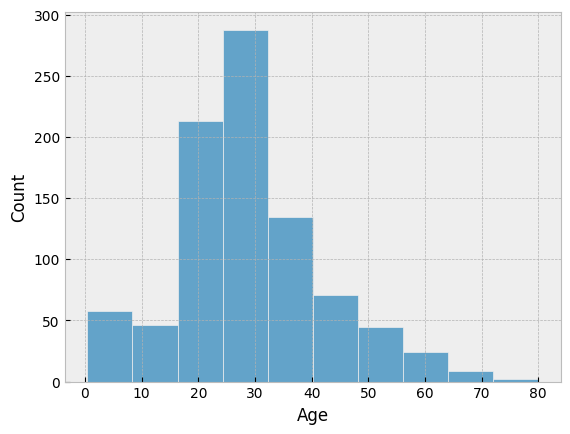

In [27]:
sns.histplot(df['Age'], bins=10)

Since the distribution is close to the previous state, we can say the imputation was successful.

In [28]:
# dropping the cabin column
df.drop(columns='Cabin', axis=1, inplace=True)

In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Child          0
Title          0
Title2         0
dtype: int64

### Feature Selection

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Child,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr,Mr


In [32]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Title', 'Title2'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


### Encoding

- Sex: Label Encoding (0 or 1)
- Embarked: OneHotEncoding 

In [33]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,0
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,0
4,0,3,0,35.0,0,0,8.0500,S,0


In [34]:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


### Feature Extraction

        - Family Size 
        - Alone Indicator
        - Child Indicator 
        - Age bands (binning)

In [35]:
df['Age'].max()

80.0

In [36]:
# when we build bins, we can directly encode them to avoid additional steps
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12, 19, 40, 60, 81], labels=[0,1,2,3,4])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,AgeBin
0,0,3,0,22.0,1,0,7.2500,0,0,0,1,2
1,1,1,1,38.0,1,0,71.2833,0,1,0,0,2
2,1,3,1,26.0,0,0,7.9250,0,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,0,0,0,1,2


In [37]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [38]:
df['Alone'] = (df['FamilySize'] == 1).astype(int)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,Alone
241,1,3,1,21.0,1,0,15.5000,0,0,1,0,2,2,0
815,0,1,0,30.0,0,0,0.0000,0,0,0,1,2,1,1
173,0,3,0,21.0,0,0,7.9250,0,0,0,1,2,1,1
532,0,3,0,17.0,1,1,7.2292,0,1,0,0,1,3,0
259,1,2,1,50.0,0,1,26.0000,0,0,0,1,3,2,0
459,0,3,0,30.0,0,0,7.7500,0,0,1,0,2,1,1
5,0,3,0,30.0,0,0,8.4583,0,0,1,0,2,1,1
417,1,2,1,18.0,0,2,13.0000,0,0,0,1,1,3,0
204,1,3,0,18.0,0,0,8.0500,0,0,0,1,1,1,1
33,0,2,0,66.0,0,0,10.5000,0,0,0,1,4,1,1


To reduce redundancy we can drop SibSp and Parch

In [39]:
df.drop(columns=['SibSp','Parch'], inplace=True, axis=1)

**Homework** perform outlier analysis and address outliers if needed.

## Stage 2

### Splitting The Data Into X and y

In [40]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Child', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeBin', 'FamilySize', 'Alone'],
      dtype='object')

In [41]:
# features
X = df.drop(columns='Survived', axis=1) # df.iloc[:,1:]

#target
y = df['Survived']

In [42]:
X.head()

,Pclass,Sex,Age,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,Alone
0,3,0,22.0,7.2500,0,0,0,1,2,2,0
1,1,1,38.0,71.2833,0,1,0,0,2,2,0
2,3,1,26.0,7.9250,0,0,0,1,2,1,1
3,1,1,35.0,53.1000,0,0,0,1,2,2,0
4,3,0,35.0,8.0500,0,0,0,1,2,1,1


### Feature Scaling

We can choose one of the 2 common scaling techniques Standardization (`StandardScaler`) and Normalization (`MinMaxScaler`)

In [43]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)


In [44]:
X_scaled[:3] #first 3 rows of the scaled array

array([[1.        , 0.        , 0.27117366, 0.01415106, 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.1       ,
        0.        ],
       [0.        , 1.        , 0.4722292 , 0.13913574, 0.        ,
        1.        , 0.        , 0.        , 0.5       , 0.1       ,
        0.        ],
       [1.        , 1.        , 0.32143755, 0.01546857, 0.        ,
        0.        , 0.        , 1.        , 0.5       , 0.        ,
        1.        ]])

In [45]:
np.min(X_scaled), np.max(X_scaled)

(0.0, 1.0)

In [46]:
# optional - unnecessary -for visual purposes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Pclass,Sex,Age,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,Alone
0,1.0,0.0,0.271174,0.014151,0.0,0.0,0.0,1.0,0.50,0.1,0.0
1,0.0,1.0,0.472229,0.139136,0.0,1.0,0.0,0.0,0.50,0.1,0.0
2,1.0,1.0,0.321438,0.015469,0.0,0.0,0.0,1.0,0.50,0.0,1.0
3,0.0,1.0,0.434531,0.103644,0.0,0.0,0.0,1.0,0.50,0.1,0.0
4,1.0,0.0,0.434531,0.015713,0.0,0.0,0.0,1.0,0.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0.5,0.0,0.334004,0.025374,0.0,0.0,0.0,1.0,0.50,0.0,1.0
885,0.0,1.0,0.233476,0.058556,0.0,0.0,0.0,1.0,0.25,0.0,1.0
886,1.0,1.0,0.258608,0.045771,0.0,0.0,0.0,1.0,0.50,0.3,0.0
887,0.0,0.0,0.321438,0.058556,0.0,1.0,0.0,0.0,0.50,0.0,1.0


### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=.2, #80:20 ratio for Train: Test
                                                    random_state=10
                                                    )

In [49]:
df.shape

(889, 12)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 11), (178, 11), (711,), (178,))

In [50]:
.8*len(df)

711.2

## ML Model Building

- This is a **Supervised Learning** and **Binary Classification** problem. 
- There are multiple classification algorithms we can use to solve for this problem. One of the most popular classification algorithms is **Logistic Regression**, which works only on binary classification.
- It can learn and predict binary outcome from probabilities (between 0 and 1)
- The logic uses the Logistic Function (Sigmoid), which maps raw probability values between 0 and 1
- By default, it uses a threshold of 0.5 (50%)
    - If the output > 0.5 then it's 1
    - If the output < 0.5 then it's 0



![LR](https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png)

### 1. Model Training

In [51]:
from sklearn.linear_model import LogisticRegression

# create the model object 
lr_model = LogisticRegression() #each model has its own attributes to be tweaked. They're called hyperparameters
#leaving the function blank (no attributes specified) means using the default hyperparameters

In [52]:
# train the model
lr_model.fit(X_train, y_train)

LogisticRegression()

- Now that the model is defined and trained, we can use it to make predictions using our test data (X_test)
- Then, for evaluation, we can compare the predicted outcome to actual (y_test)

### 2. Model Prediction and Evaluation

In [53]:
# create the prediction dataset
y_test_pred = lr_model.predict(X_test)

In [54]:
y_test_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0])

In [55]:
len(y_test_pred)

178

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
lr_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Logistic Regression Model Accuracy Score: {lr_accuracy:.2f}')

Logistic Regression Model Accuracy Score: 0.83


In [ ]:
lr_model.score(y_test, y_test_pred)

- Our model performed at 83% accuracy
- A general rule is to have an accuracy score above 75%
    - Above 80% -> good
    - Above 90% -> excellent

In [60]:
y_test == y_test_pred


635     True
647    False
566     True
195     True
731     True
       ...  
667     True
191     True
441     True
95      True
234     True
Name: Survived, Length: 178, dtype: bool

- To apply this model on a new dataset:
    - Make sure you have all columns match the training dataset (count, data type, etc...)
    - Make sure you apply the same feature engineering and preprocessing steps 

- The model is currently stored in this notebook's memory.
- To preserve the training and use it in different applications, you need to export the trained model.

### Exporting The Model After Training

`pip install joblib`

In [61]:
import joblib

In [62]:
# save the model
joblib.dump(lr_model, 'titanic_logistic_regression.pkl') #pickle file output

['titanic_logistic_regression.pkl']

In [63]:
# load the model
loaded_lr_model = joblib.load('titanic_logistic_regression.pkl')

In [ ]:
# use the loaded model
new_prediction = loaded_lr_model.predict(new_dataset)